### Objectives
1. Understanding the distribution of traffic: Analyzing the distribution of the number of vehicles across different junctions and at different times. This can help identify peak and off-peak hours, and understand how traffic varies across junctions.
2. Identifying trends and patterns: Looking for trends in the data, such as whether traffic is increasing or decreasing over time, and whether there are any noticeable patterns, such as more traffic on certain days of the week.
3. Dealing with missing or sparse data: Some junctions have provided limited or sparse data. Explore strategies for dealing with this, such as imputing missing values or using statistical techniques to make predictions based on the available data.
4. Correlation between variables: Investigating if there’s any correlation between different variables in your dataset. For example, finding out if traffic at one junction is correlated with traffic at another junction.

<h2><center>Loading Data</center></h2>

In [1]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [5]:
# loading data

df = pd.read_csv('traffic.csv')
df.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


#### About the data

This dataset is a collection of numbers of vehicles at four junctions at an hourly frequency. The CSV file provides four features:

1. DateTime
2. Junctions
3. Vehicles
4. ID

The sensors on each of these junctions were collecting data at different times, hence the traffic data from different time periods. Some of the junctions have provided limited or sparse data.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
 3   ID        48120 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


<h2><center>Data Exploration</center></h2>

- Pharsing dates
- Ploting timeseries
- Feature engineering for EDA

In [12]:
# converting the DateTime column from object dtype to a pandas datetime dtype.
df["DateTime"]= pd.to_datetime(df["DateTime"])

# dropping the ID column
df = df.drop(["ID"], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DateTime  48120 non-null  datetime64[ns]
 1   Junction  48120 non-null  int64         
 2   Vehicles  48120 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.1 MB


Text(0.5, 0, 'Date')

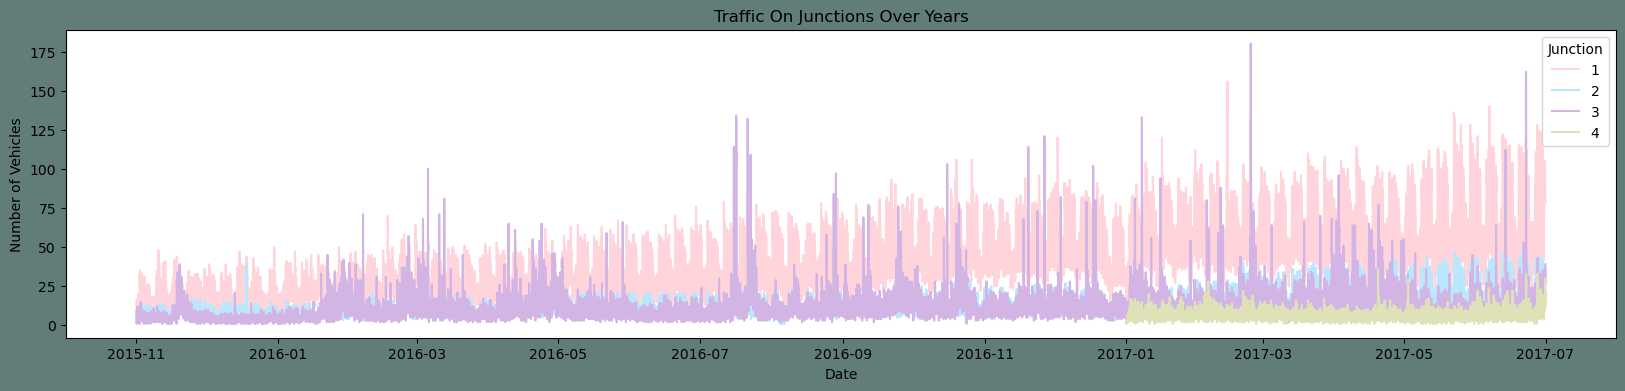

In [13]:
# plotting time series
colors = [ "#FFD4DB","#BBE7FE","#D3B5E5","#dfe2b6"] # creating a list of colors using their hexcodes

plt.figure(figsize = (20,4), facecolor = "#627D78") # facecolor is for the fig bg color

Time_series = sns.lineplot(x = 'DateTime', y = "Vehicles", data = df, hue= "Junction", palette = colors)
Time_series.set_title("Traffic On Junctions Over Years")
Time_series.set_ylabel("Number of Vehicles")
Time_series.set_xlabel("Date")

#### Noticeable information in the above plot:

- It can be seen that Junction 1 is having an upward trend.
- Traffic patterns at Junction 2 are relatively stable, with only occasional periods of high traffic.
- For Junction 3, there is a high fluctuation of vehicles over time.
- The data for Junction 4 is sparse starting only after 2017.

Seasonality is not evident from the above plot, So further exploration of the datetime composition must be done to figure out more about it.

<h2><center>Feature Engineering</center></h2>

Creating new features out of DateTime. 
- Year
- Month
- Date in the given month
- Days of week
- Hour

In [14]:
# creating more features 
df["Year"]= df['DateTime'].dt.year
df["Month"]= df['DateTime'].dt.month
df["Date_no"]= df['DateTime'].dt.day
df["Hour"]= df['DateTime'].dt.hour
df["Day"]= df.DateTime.dt.strftime("%A")
df.head()

,DateTime,Junction,Vehicles,Year,Month,Date_no,Hour,Day
0,2015-11-01 00:00:00,1,15,2015,11,1,0,Sunday
1,2015-11-01 01:00:00,1,13,2015,11,1,1,Sunday
2,2015-11-01 02:00:00,1,10,2015,11,1,2,Sunday
3,2015-11-01 03:00:00,1,7,2015,11,1,3,Sunday
4,2015-11-01 04:00:00,1,9,2015,11,1,4,Sunday


<h2><center>Exploratory Data Analysis</center></h2>

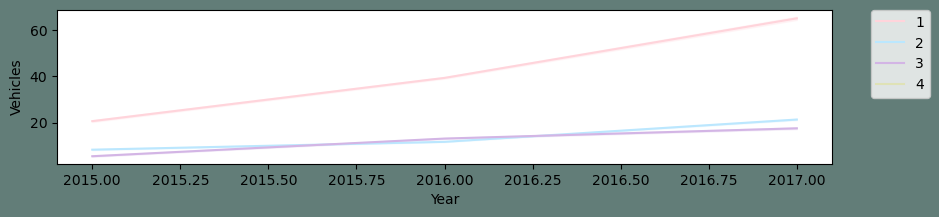

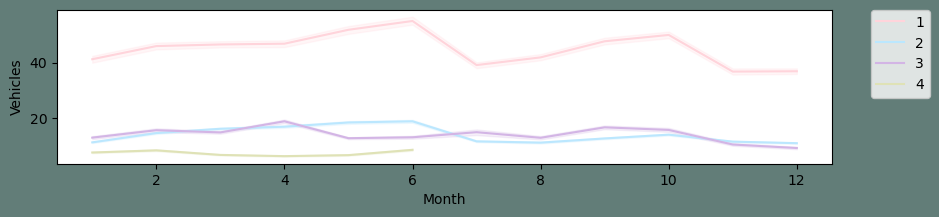

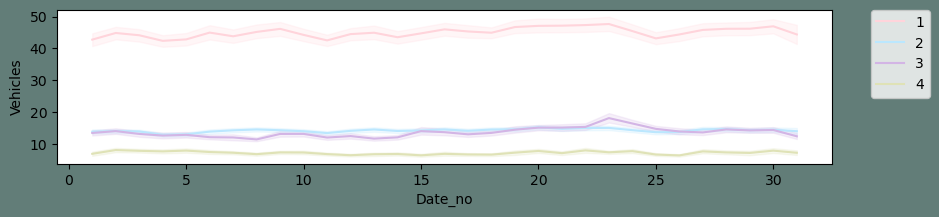

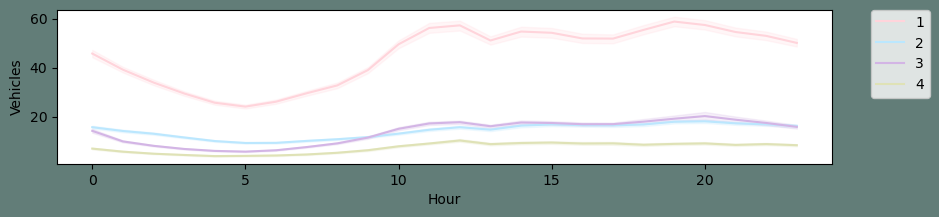

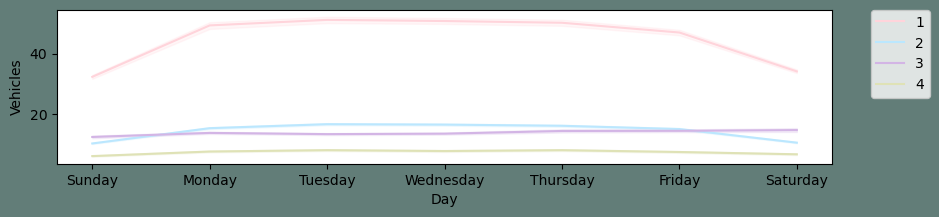

In [19]:
# plotting timeseries for the new features

new_features = [ "Year","Month", "Date_no", "Hour", "Day"]

for i in new_features:
    plt.figure(figsize = (10,2), facecolor="#627D78")
    ax=sns.lineplot(x = i, y= "Vehicles", data = df, hue = "Junction", palette = colors )
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

From the above plot following things can be concluded:

- Yearly, there has been an upward trend for all junctions except for the Junction 4. And it has been noted that Junction 4 started only after 2017, hence no prev year trend for it. 

- Monthly, there is a similar trend in the rise and fall of traffic in Junction 1 and 2, both showing traffic influx around June. For Junction 3, the traffic there is not quite similar with that of Junction 1 and 2, showing influx of traffic around April which is followed by a decrease in traffic around May. Junction 4 is quite stable along its first 6 months. 

- Throughout all the dates there is a good consistency in data.

- For a day, we can see that are peaks during morning and evening times and a decline during night hours. This is as per expectation.

- For weekly patterns, Sundays enjoy smoother traffic as there are lesser vehicles on roads. Whereas Monday to Friday the traffic is steady.

Text(0.5, 0, 'Date')

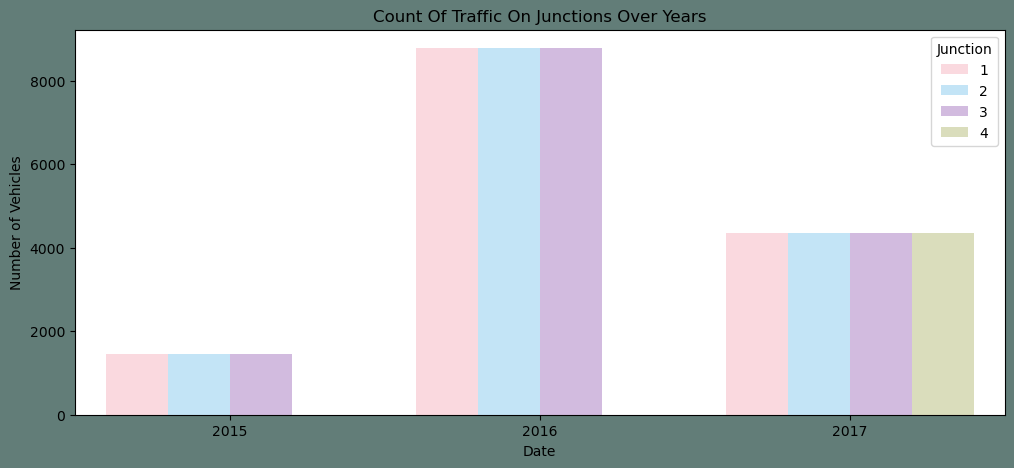

In [22]:
plt.figure(figsize=(12,5),facecolor="#627D78")
count = sns.countplot(data=df, x =df["Year"], hue="Junction", palette=colors)
count.set_title("Count Of Traffic On Junctions Over Years")
count.set_ylabel("Number of Vehicles")
count.set_xlabel("Date")

The count plot shows that there is an increase in the number of vehicles between 2015 and 2016. However, it is inconclusive to say the same about 2017 as we have limited data for 2017 ie till the 7th month.

<AxesSubplot: >

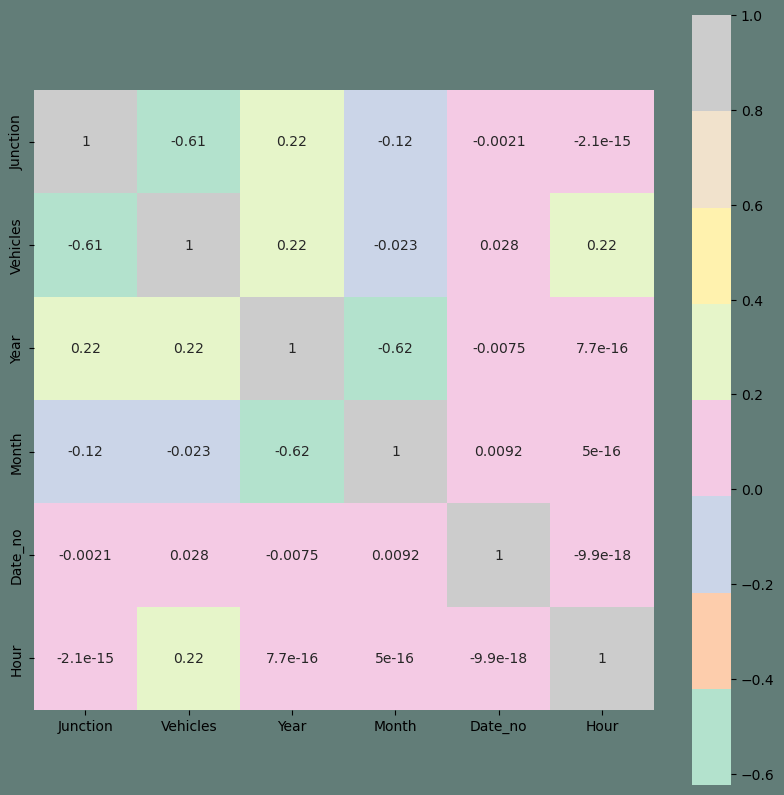

In [23]:
# visualising correlation matrix for the dataset
corrmat = df.corr()
plt.subplots(figsize=(10,10),facecolor="#627D78")
sns.heatmap(corrmat, cmap = "Pastel2", annot=True,square=True, )

There is high correlation with the preexisting features. 

We can see that there is a strong negative correlation between the number of vehicles and the traffic per Junction.

Also, we can see a weak positive correlation between the year period and the traffic per Junction.

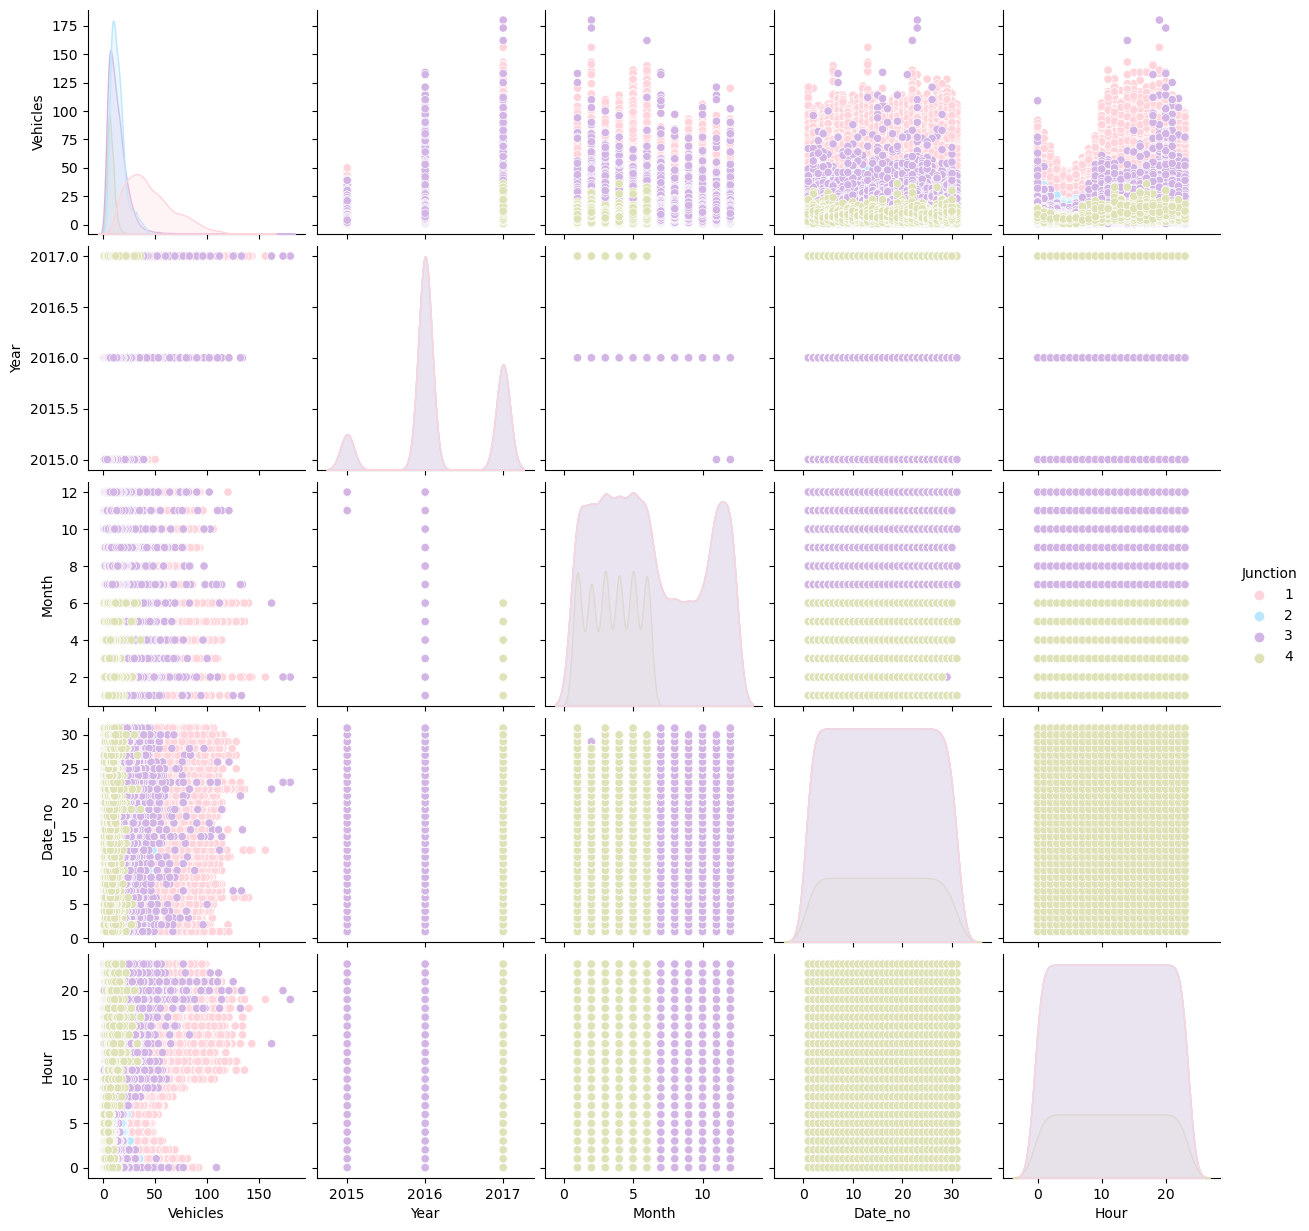

In [25]:
sns.pairplot(data=df, hue= "Junction",palette=colors)
# plt.plot()

### Conclusions
- The range of data from all four junctions across periods is not the same. 
- Data provided for the fourth junction is limited to only 2017.
- The yearly trend for Junctions one, two and three have diffrent slopes.
- Junction number one has a more strong weekly seasonality in comparison to the other junctions.

In [26]:
df.head()

,DateTime,Junction,Vehicles,Year,Month,Date_no,Hour,Day
0,2015-11-01 00:00:00,1,15,2015,11,1,0,Sunday
1,2015-11-01 01:00:00,1,13,2015,11,1,1,Sunday
2,2015-11-01 02:00:00,1,10,2015,11,1,2,Sunday
3,2015-11-01 03:00:00,1,7,2015,11,1,3,Sunday
4,2015-11-01 04:00:00,1,9,2015,11,1,4,Sunday
